In [177]:
import numpy as np
import pandas as pd
from scipy import stats

In [178]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (14, 9)

In [179]:
data = pd.read_csv( 'hw_25000.csv',delimiter = ';', names = ['index', 'height_inches', 'weight_pounds'], header = 0, 
                   dtype={'index': int,'height_inches': float,'weight_pounds': float} )
data.head()

,index,height_inches,weight_pounds
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [180]:
data['height'] = round(data['height_inches'] * 2.54,1)
data['weight'] = round(data['weight_pounds'] * 0.453592,1)
data.head()

,index,height_inches,weight_pounds,height,weight
0,1,65.78331,112.9925,167.1,51.3
1,2,71.51521,136.4873,181.6,61.9
2,3,69.39874,153.0269,176.3,69.4
3,4,68.21660,142.3354,173.3,64.6
4,5,67.78781,144.2971,172.2,65.5


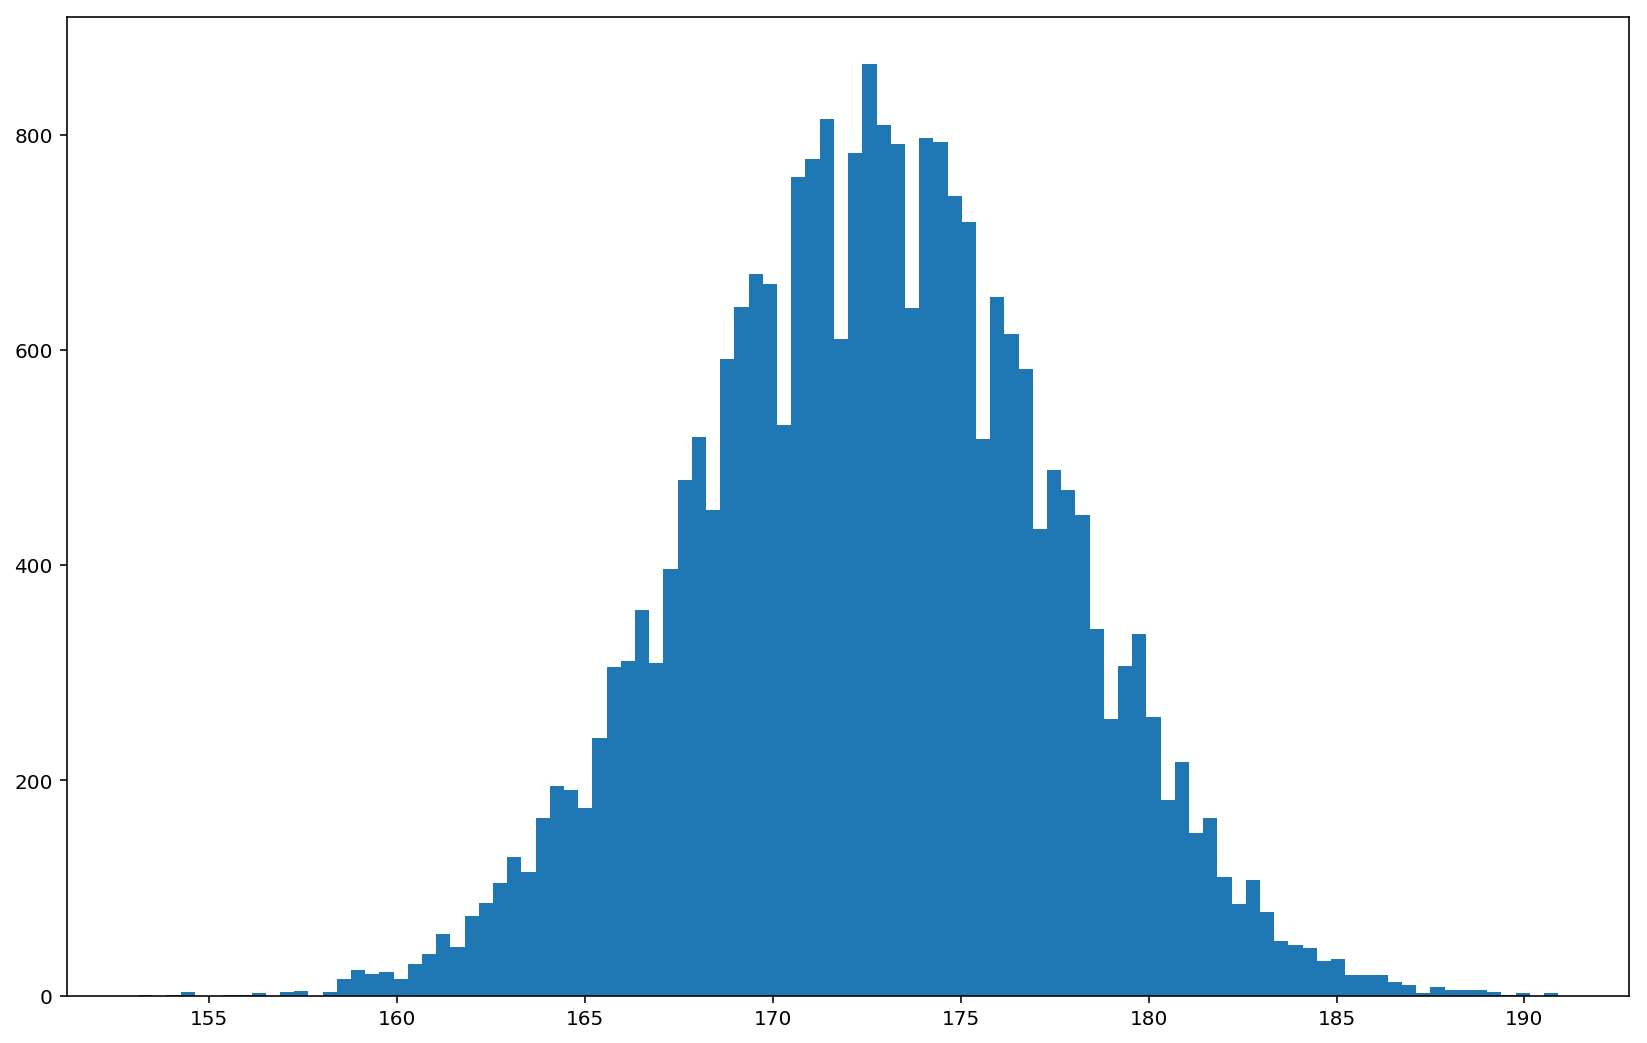

In [160]:
plt.hist( data['height'], bins = 100)
plt.show()

In [161]:
#men_higet_ower_170 = data[height_inches>70]
data.drop('height_inches',axis=1)
data.drop('weight_pounds',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 5 columns):
index            25000 non-null int32
height_inches    25000 non-null float64
weight_pounds    25000 non-null float64
height           25000 non-null float64
weight           25000 non-null float64
dtypes: float64(4), int32(1)
memory usage: 879.0 KB


In [162]:
data.height.value_counts().shape

(323,)

In [163]:
height_people = data[data.height > 170].drop('height_inches',axis=1).drop('weight_pounds',axis=1).drop('index',axis=1).copy()
height_people = height_people[:20].copy()
height_people

,height,weight
1,181.6,61.9
2,176.3,69.4
3,173.3,64.6
4,172.2,65.5
5,174.5,55.9
6,177.3,64.2
7,177.8,61.9
8,172.5,51.0
11,171.8,51.8
12,173.5,57.0


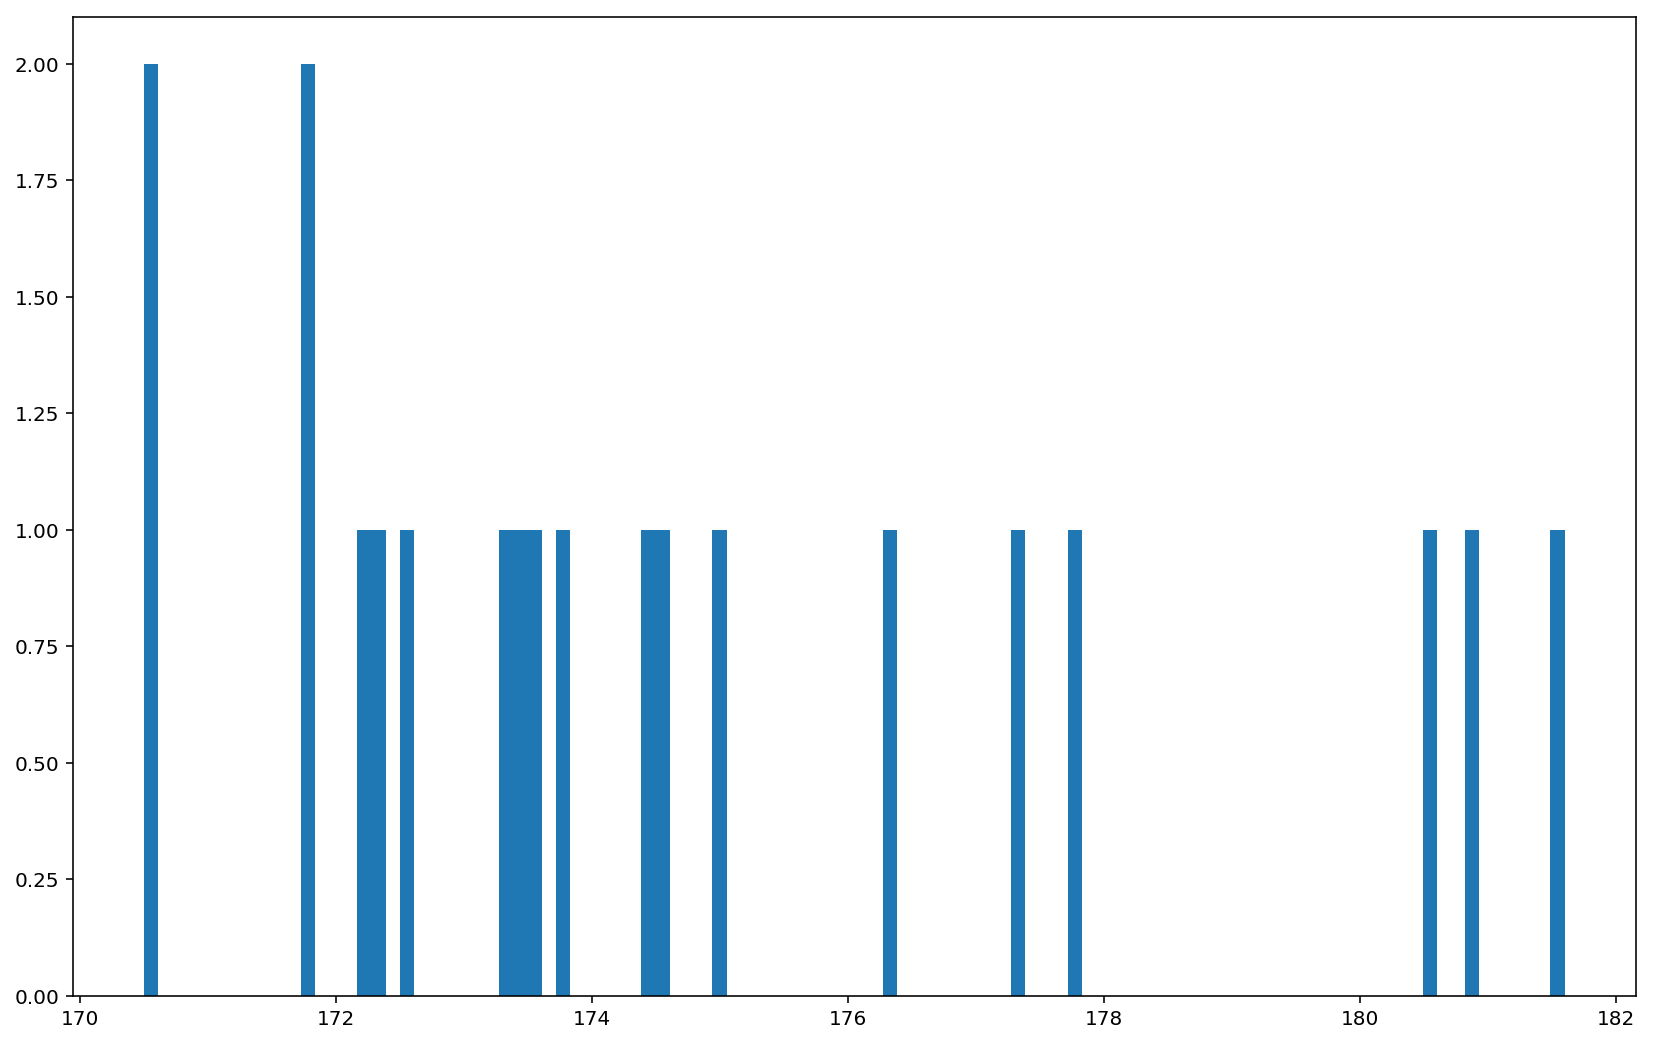

In [164]:
plt.hist( height_people['height'], bins = 100)
plt.show()

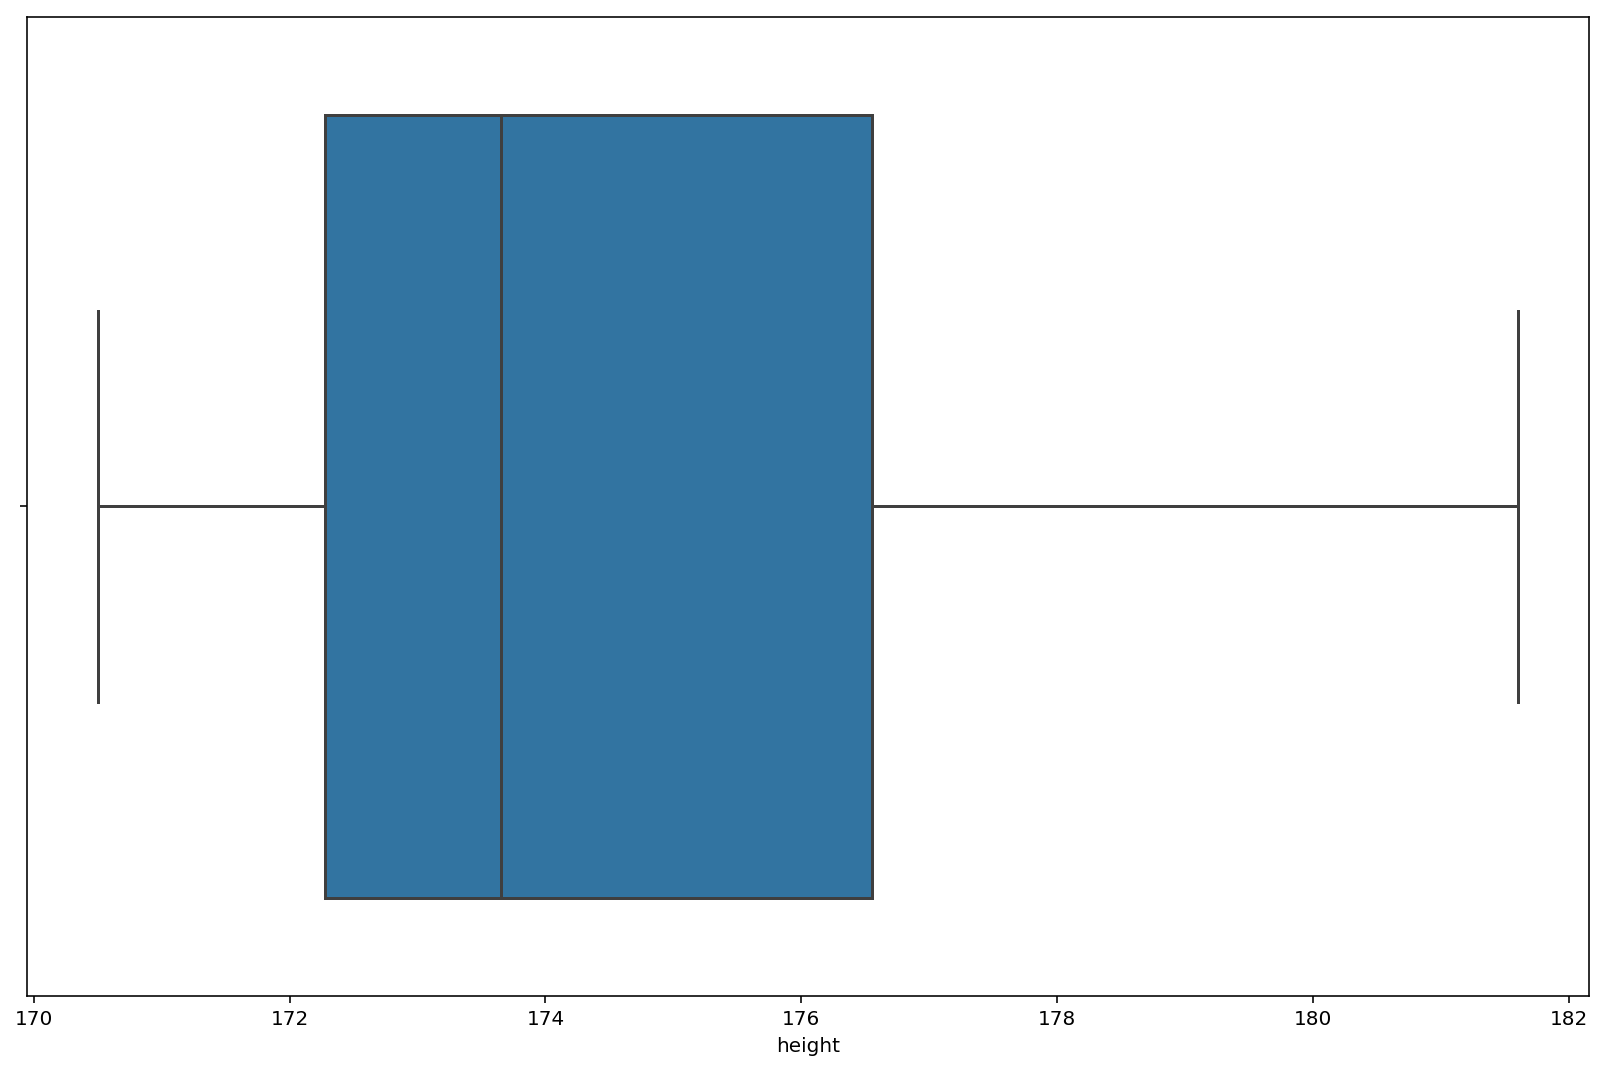

In [165]:
sns.boxplot(data=height_people, x = 'height')

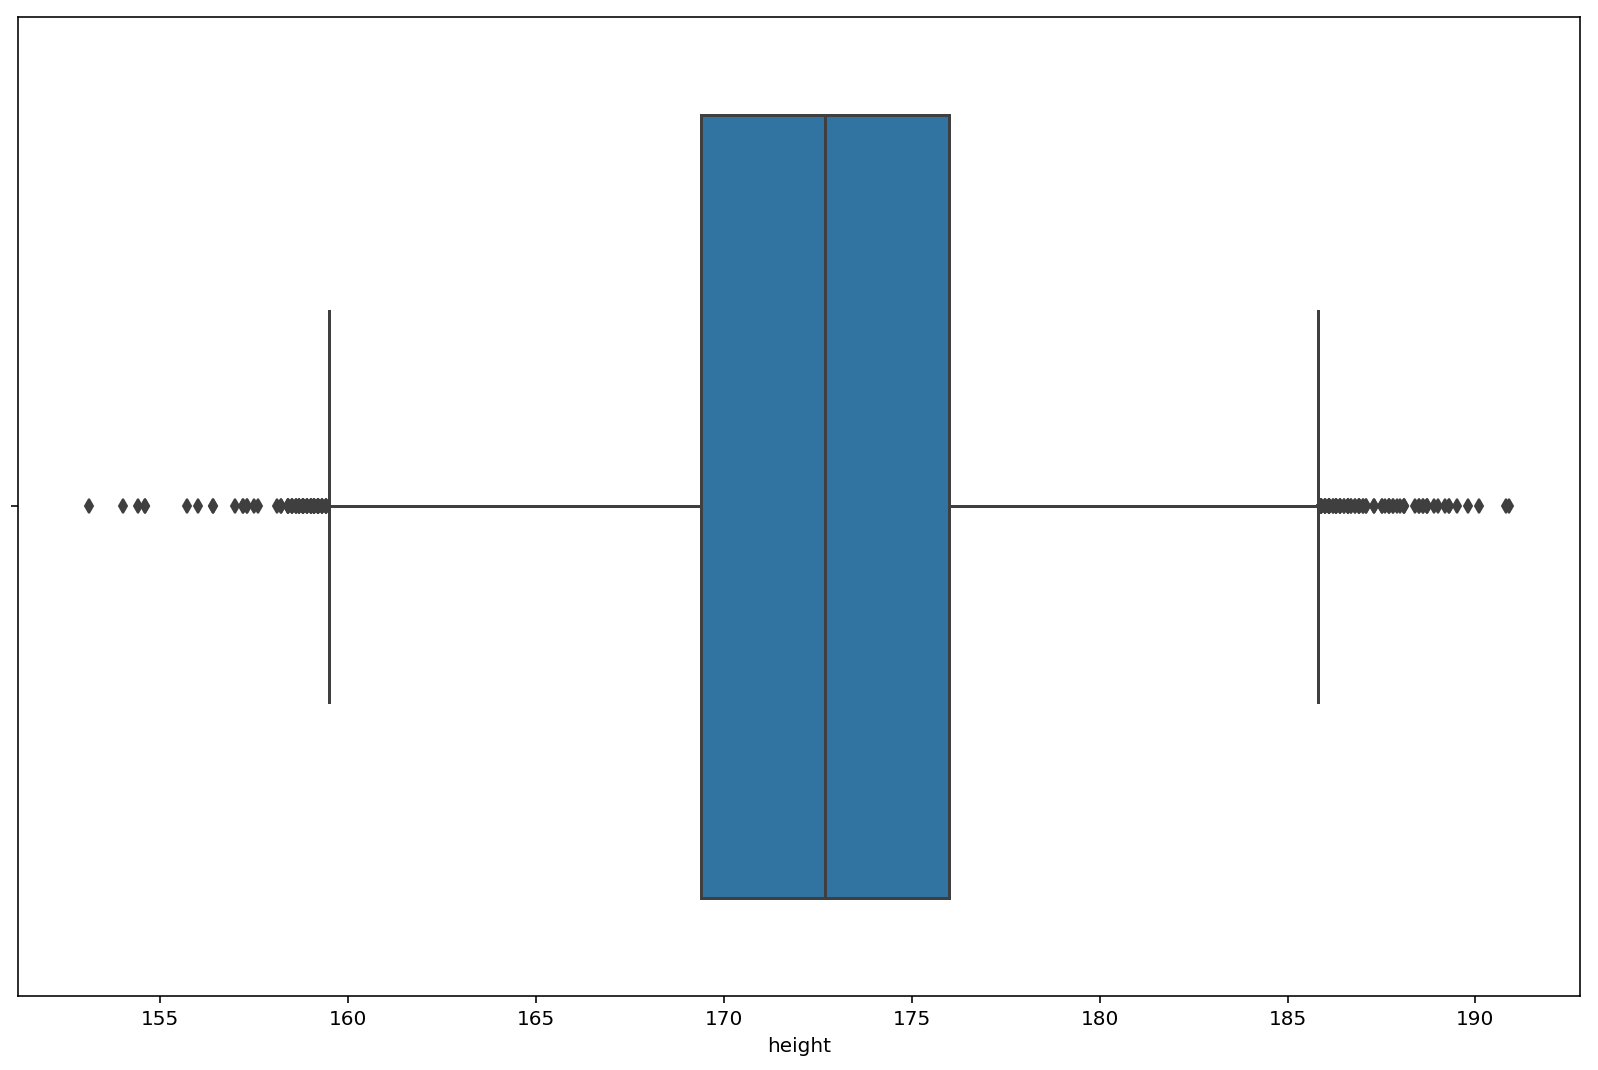

In [166]:
sns.boxplot(data=data, x = 'height')

In [167]:
data_mean_weight = np.mean(data.weight)
data_mean_weight

57.64195999999975

In [169]:
#data_q = (np.mean((a - y_test)**2))**0.5

In [170]:
height_people_mean_weight = np.mean(height_people.weight)
height_people_mean_weight


60.544999999999995

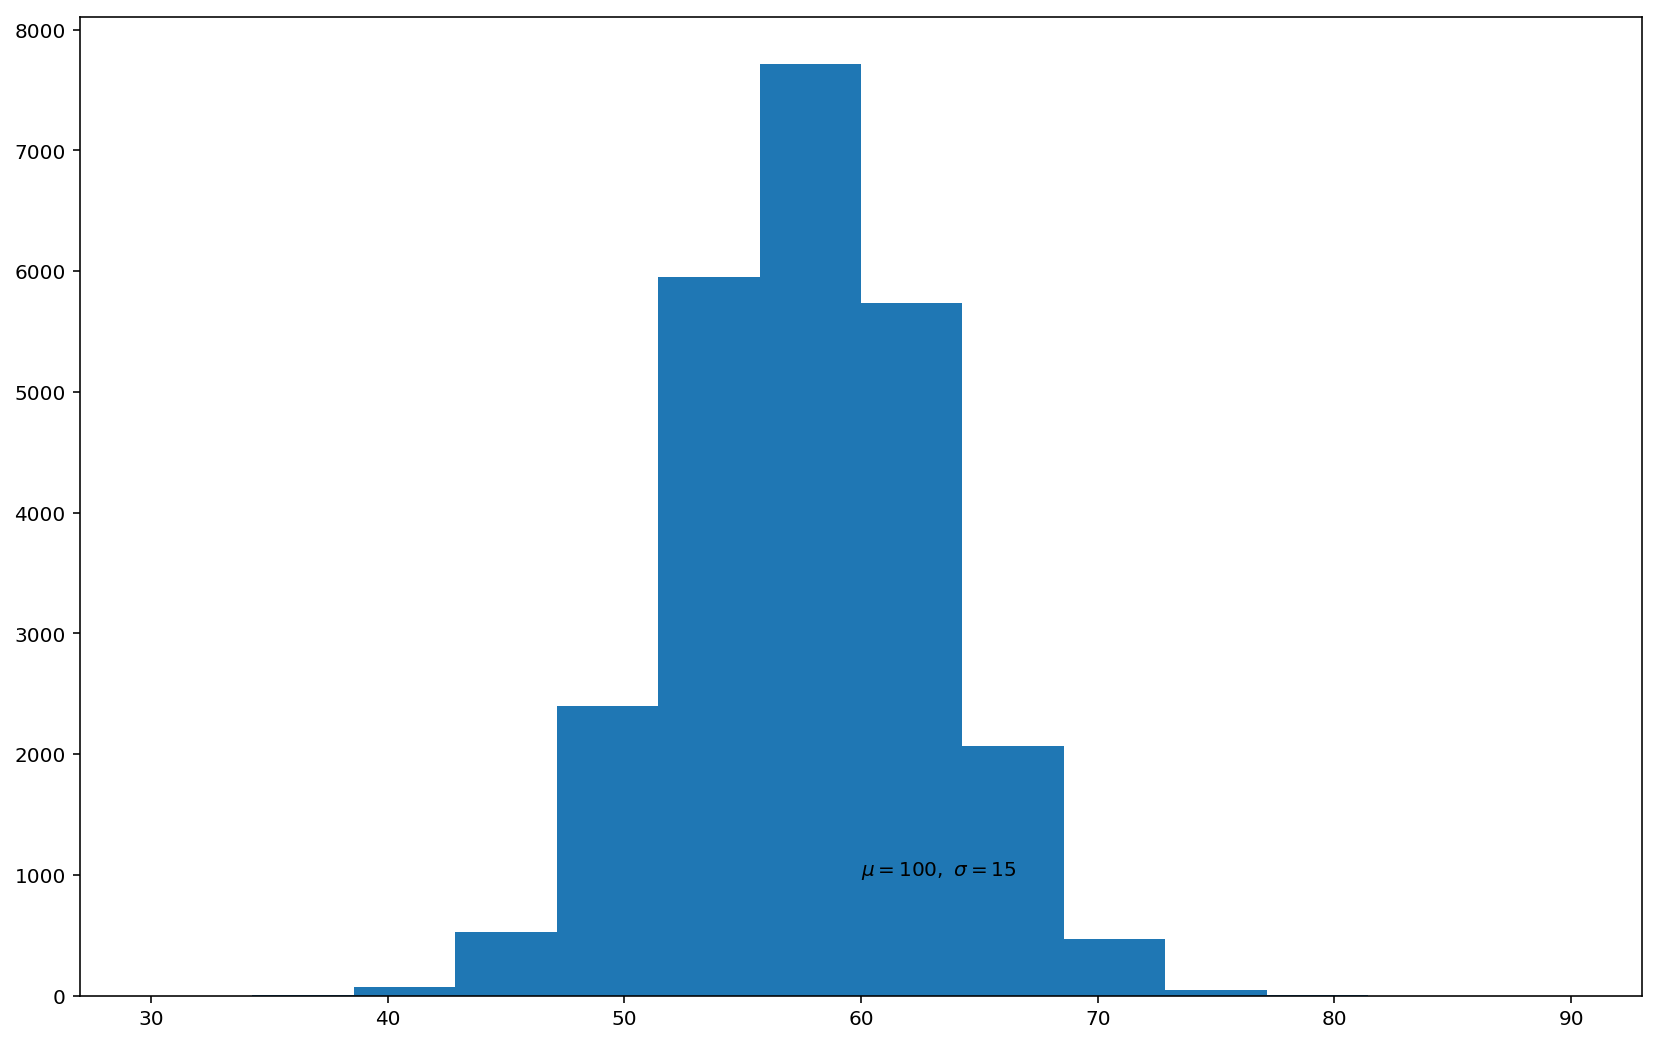

In [171]:
bins = np.linspace( 30, 90, 15 )
plt.hist( data['weight'], bins )
plt.text(60, 1000, r'$\mu=100,\ \sigma=15$')
plt.show()

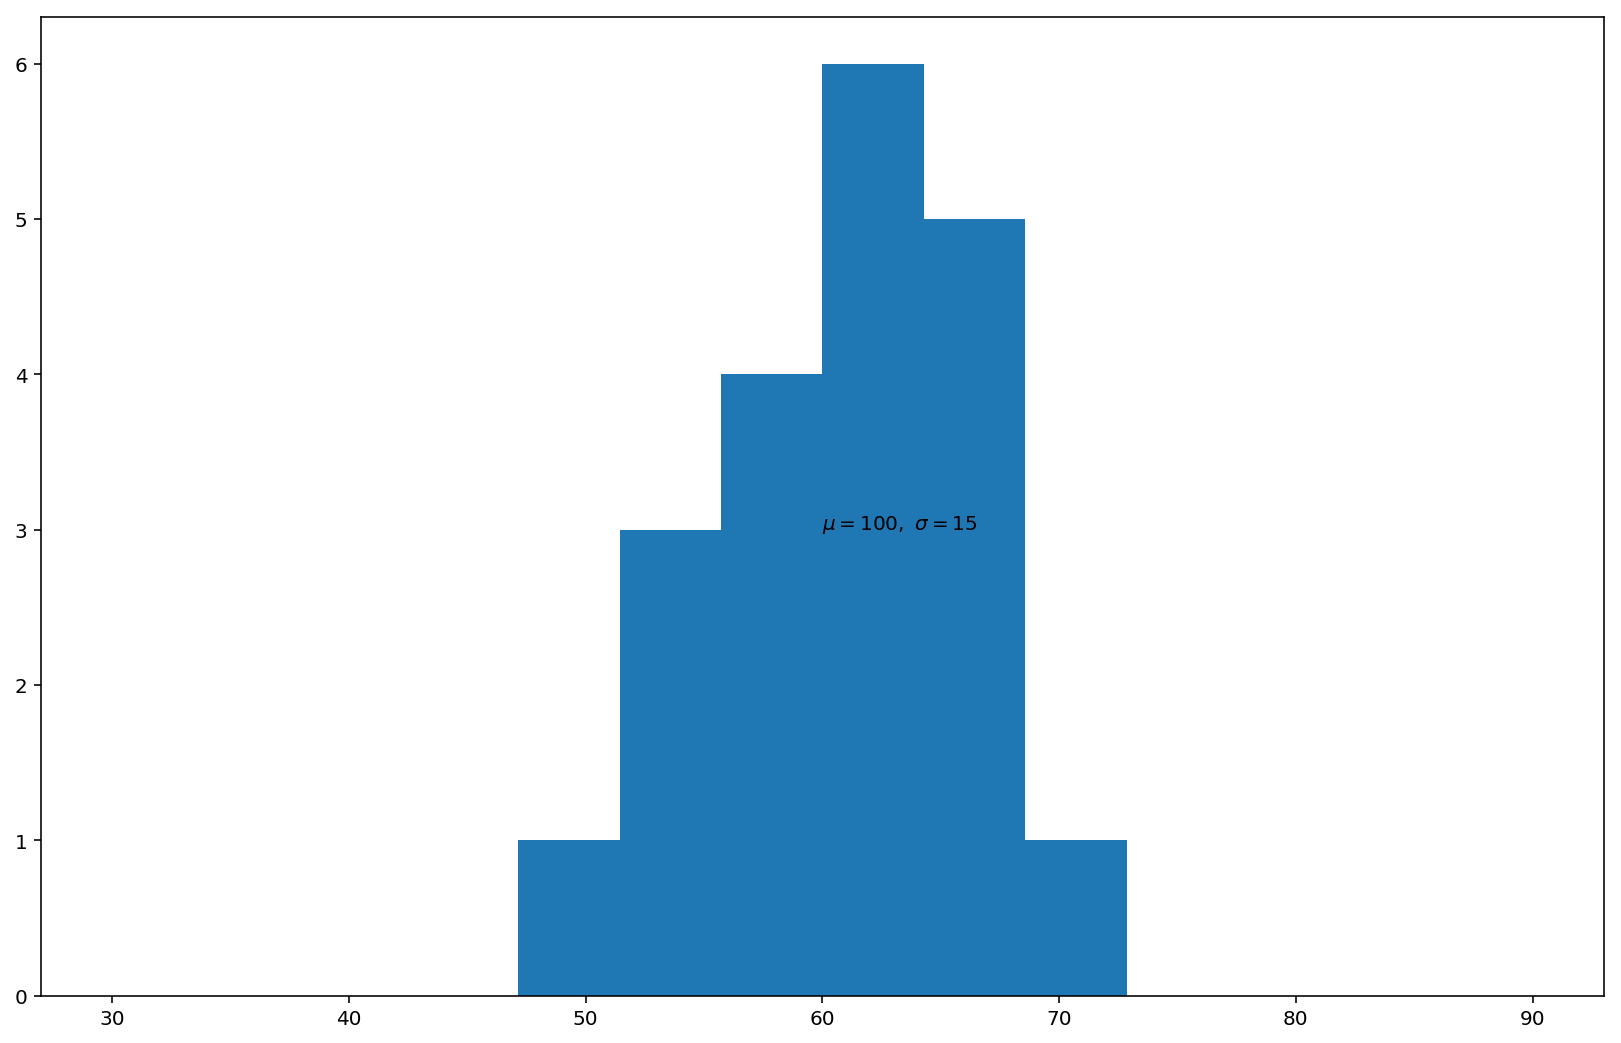

In [172]:
bins = np.linspace( 30, 90, 15 )
plt.hist( height_people['weight'], bins)
plt.text(60, 3, r'$\mu=100,\ \sigma=15$')
plt.show()

In [173]:
sample = height_people['weight'].tolist()
sample

[61.9,
 69.4,
 64.6,
 65.5,
 55.9,
 64.2,
 61.9,
 51.0,
 51.8,
 57.0,
 55.5,
 52.7,
 63.5,
 64.9,
 62.6,
 56.3,
 64.1,
 65.1,
 58.7,
 64.3]

In [174]:
np.mean( sample )

60.545000000000002

In [175]:
data['weight'].mean()

57.64195999999975

In [181]:
stats.ttest_1samp( sample, data['weight'].mean())

Ttest_1sampResult(statistic=2.4674949972751437, pvalue=0.023278995632489544)